Домашнее задание 2. 

The file should be sent in the `.pdf` format created via $\LaTeX$ or [typora](<https://typora.io/>) or printed from pdf with the colab\jupyter notebook. The only handwritten part, that could be included in the solution are the figures and illustrations.

**Deadline: 08.05.22 21:59:59**

# 😱 Newton convergence issue
Рассмотрите следующую функцию:

$$
f(x,y) = \dfrac{x^4}{4} - x^2 + 2x + (y-1)^2
$$

И точку старта $x_0 = (0,2)^\top$. Как ведет себя метод Ньютона, запущенный с этой точки? Чем это можно объяснить? 

Как ведет себя градиентный спуск с фикисрованным шагом $\alpha = 0.01$ и метод наискорейшего спуска в таких же условиях?
(в этом задании не обязательно показывать численные симуляции)

<font color="lime"> ==YOUR ANSWER== </font>

Найдём Гессиан данной функции:

$\nabla f = \begin{pmatrix}
  x^3 - 2x + 2\\
  2(y - 1)
\end{pmatrix}, \; \; \;
\nabla ^2 f = \begin{pmatrix}
  3x^2 - 2 & 0\\
  0 & 2
\end{pmatrix} \; \;$

Заметим, что не при всех $x$ матрица Гессиана положительно определена - в том числе, в начальной точке $x=0\Rightarrow$ метод Ньютона не будет сходиться. Посчитаем несколько итераций, чтобы увидеть, что происходит:

1. $\nabla f \begin{pmatrix}
  0\\
  2
\end{pmatrix} = 
\begin{pmatrix}
  2\\
  2
\end{pmatrix}, \; \; \;
\nabla ^2 f \begin{pmatrix}
  0\\
  2
\end{pmatrix} = 
\begin{pmatrix}
  - 2 & 0\\
  0 & 2
\end{pmatrix}, \; \; \;
(\nabla ^2 f)^{-1} \begin{pmatrix}
  0\\
  2
\end{pmatrix} = 
\begin{pmatrix}
  - 0.5 & 0\\
  0 & 0.5
\end{pmatrix}\;\;\;\Rightarrow\;\;\;
x_1 = \begin{pmatrix}
  0\\
  2
\end{pmatrix} - 
\begin{pmatrix}
  -1\\
  1
\end{pmatrix} = 
\begin{pmatrix}
  1\\
  1
\end{pmatrix}
$

$\;\;$

2. $\nabla f \begin{pmatrix}
  1\\
  1
\end{pmatrix} = 
\begin{pmatrix}
  1\\
  0
\end{pmatrix}, \; \; \;
\nabla ^2 f \begin{pmatrix}
  1\\
  1
\end{pmatrix} = 
\begin{pmatrix}
  1 & 0\\
  0 & 2
\end{pmatrix}, \; \; \;
(\nabla ^2 f)^{-1} \begin{pmatrix}
  0\\
  2
\end{pmatrix} = 
\begin{pmatrix}
  1 & 0\\
  0 & 0.5
\end{pmatrix}\;\;\;\Rightarrow\;\;\;
x_2 = \begin{pmatrix}
  1\\
  1
\end{pmatrix} - 
\begin{pmatrix}
  1\\
  0
\end{pmatrix} = 
\begin{pmatrix}
  0\\
  1
\end{pmatrix}
$

$\;\;$

3. $\nabla f \begin{pmatrix}
  0\\
  1
\end{pmatrix} = 
\begin{pmatrix}
  2\\
  0
\end{pmatrix}, \; \; \;
\nabla ^2 f \begin{pmatrix}
  0\\
  1
\end{pmatrix} = 
\begin{pmatrix}
  -2 & 0\\
  0 & 2
\end{pmatrix}, \; \; \;
(\nabla ^2 f)^{-1} \begin{pmatrix}
  0\\
  1
\end{pmatrix} = 
\begin{pmatrix}
  -0.5 & 0\\
  0 & 0.5
\end{pmatrix}\;\;\;\Rightarrow\;\;\;
x_3 = \begin{pmatrix}
  0\\
  1
\end{pmatrix} - 
\begin{pmatrix}
  -1\\
  0
\end{pmatrix} = 
\begin{pmatrix}
  1\\
  1
\end{pmatrix}
$

Таким образом, вернулись к результату предыдущей итерации - далее будем переходить туда-сюда между значениями $x_2$ и $x_3$ и никогда не сойдёмся; теоретическое объяснение подтверждено.

Если рассмотреть несколько итераций градиентного и наискорейшего спусков, то можно видеть, как они небольшими шагами продвигаются к решению. В этих методах при расчётах используется только градиент (Гессиана нет), на него ограничений не накладывается, других тоже нет $\Rightarrow$ при помощи этих методов будет найден ближайший к начальному приближению локальный минимум функции.

# 🥸 Quasi Comparison
Реализуйте на языке python:
* метод Ньютона
* метод SR-1

для минимизации следующих функций:
* Квадратичная форма $f(x) = \dfrac{1}{2}x^\top A x + b^\top x, \quad x \in \mathbb{R}^n, A \in \mathbb{S}_+^{n \times n}$. Попробуйте n = 2, 50, 228
* Функция Розенброка $f(x, y) = (1-x)^2 + 100(y-x^2)^2 .\quad$

Сравните 2 реализованных Вами метода И [метод](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html) `BFGS` из библиотеки `scipy`, а так же его модификацию [L-BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) в решении задачи минимизации описанных выше функций. точку старта необходимо инициализировать одинаковую для всех методов в рамках одного запуска. Необходимо провести не менее 10 запусков для каждого метода на каждой функции до достижения того критерия остановки, который вы выберете (например, расстояние до точки оптимума - во всех задачах мы её знаем)

В качестве результата нужно заполнить следующие таблички, заполнив в них усредненное по числу запусков количество итераций, необходимых для сходимости и времени работы:

Критерий остановки `расстояние до точки оптимума, 1e-7`

Число запусков `15`

P.S. если в силу каких то причин Вам не удалось сделать задание полностью, попробуйте сфокусироваться хотя бы на его части.

| Квадратичная форма. n = 2 | Iterations |         Time        |
|:-------------------------:|:----------:|:-------------------:|
|           Newton          |     1      | $4.63\cdot 10^{-5}$ |
|            SR-1           |     3      | $1.03\cdot 10^{-2}$ |
|            BFGS           |     4      | $4.62\cdot 10^{-3}$ |
|           L-BFGS          |     18     | $6.45\cdot 10^{-3}$ |

| Квадратичная форма. n = 50 | Iterations |         Time        |
|:--------------------------:|:----------:|:-------------------:|
|           Newton           |     1      | $1.41\cdot 10^{-4}$ |
|            SR-1            |     3      | $1.06\cdot 10^{-2}$ |
|            BFGS            |     3      | $5.64\cdot 10^{-3}$ |
|           L-BFGS           |     20     | $1.05\cdot 10^{-2}$ |


| Квадратичная форма. n = 228 | Iterations |         Time        |
|:---------------------------:|:----------:|:-------------------:|
|           Newton            |     1      | $1.50\cdot 10^{-3}$ |
|            SR-1             |     3      | $5.33\cdot 10^{-2}$ |
|            BFGS             |     3      | $2.84\cdot 10^{-2}$ |
|           L-BFGS            |     31     | $8.86\cdot 10^{-2}$ |

| Функция Розенброка        | Iterations |         Time        |
|:-------------------------:|:----------:|:-------------------:|
|           Newton          |     4      | $2.16\cdot 10^{-4}$ |
|            SR-1           |     43     | $1.02\cdot 10^{-2}$ |
|            BFGS           |     143    | $1.03\cdot 10^{-2}$ |
|           L-BFGS          |     68     | $2.28\cdot 10^{-3}$ |

In [ ]:
import numpy as np
from numpy.linalg import norm as norm
from scipy.optimize import minimize_scalar
import warnings
warnings.filterwarnings("ignore")

# Квадратичная форма, её градиент и гессиан
def Q(x):
    return 0.5 * x.T @ A @ x + b.T @ x

def dQ(x):
    return 0.5 * (A + A.T) @ x + b

def ddQ(x):
    return 0.5 * (A + A.T)

# Функция Розенброка, её градиент и гессиан
def R(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

def dR(x):
    return np.array([2 * (x[0] - 1) - 400 * x[0] * (x[1] - x[0] ** 2), 200 * (x[1] - x[0] ** 2)])

def ddR(x):
    return np.array([[2 - 400 * x[1] + 1200 * x[0] ** 2, -400 * x[0]], [-400 * x[0], 200]])


def newton(df, ddf, x0, x_opt, eps):
    """ Метод Ньютона;
        Вход: градиент, гессиан, нач. прибл., опт. значение, точность;
        Выход: кол-вот итераций, оптимальный х.
    """
    x = x0.copy()
    niter = 0
    while np.linalg.norm(x - x_opt) > eps:
        x -= np.linalg.inv(ddf(x)) @ df(x)
        niter += 1
        #print(x)
    return niter, x

def SR1(f, df, x0, H0, x_opt, eps):
    """ Метод SR-1;
        Вход: функция, градиент, нач. прибл. x и гессиана, опт. значение, точность;
        Выход: кол-вот итераций, оптимальный х.
    """
    niter = 0
    x = x0.copy()
    H = H0.copy()
    while norm(x - x_opt) > eps:
        p = - H @ df(x)
        alpha = minimize_scalar(lambda alpha: f(x + alpha * p)).x

        dx = alpha * p
        dy = df(x + dx) - df(x)
        niter += 1
        z = np.matrix(dx - H @ dy) 
        H += z.T @ z / (z @ dy)     
        x = x + dx 
        
    return niter, x

In [ ]:
# Протестируем метод Ньютона
# оптимальные значения для обоих функкций найдены аналитически
A = np.array([[2, 1], [0, 3]])
b = np.array([2, 7])
x_opt_Q = np.linalg.inv(A + A.T) @ (-2 * b)
print(x_opt_Q)
x_opt_R = np.array([1, 1])

print('Newton for Q:', newton(dQ, ddQ, np.array([-100.0, -200.0]), x_opt_Q, 1e-7))
print('Newton for R:', newton(dR, ddR, np.array([-100.0, -200.0]), x_opt_R, 1e-7))

[-0.43478261 -2.26086957]
Newton for Q: (1, array([-0.43478261, -2.26086957]))
Newton for R: (4, array([1., 1.]))


In [ ]:
# Протестируем метод SR-1
A = np.array([[2, 1], [0, 3]])
b = np.array([2, 7])
x0 = np.array([3.0, 3.0])
H0 = np.eye(2)
x_opt_Q = np.linalg.inv(A + A.T) @ (-2 * b)
print(x_opt_Q)
x_opt_R = np.array([1, 1])

print('SR1 for Q:', SR1(Q, dQ, x0, H0, x_opt_Q, 1e-7))
print('SR1 for R:', SR1(R, dR, x0, H0, x_opt_R, 1e-7))

[-0.43478261 -2.26086957]
SR1 for Q: (2, array([-0.43478262, -2.26086956]))
SR1 for R: (25, array([1., 1.]))


In [ ]:
from scipy.optimize import minimize
import time

def experiment_Q(x0, H0, f, df, ddf, x_opt):
    """
        Вспомогательная функция для запусков всех методов для различных n;
        Вход: начальное приближение x и гессиана;
        Выход: массивы средних значений времени работы и кол-ва итераций.
    """
    times = np.zeros((4, 15))
    iterations = np.zeros((4, 15))
    for i in range(15):
        # Newton
        start = time.time()
        niter = newton(df, ddf, x0, x_opt, 1e-7)[0]
        times[0, i] = time.time() - start
        iterations[0, i] = niter
        
        # SR-1
        start = time.time()
        niter = SR1(f, df, x0, H0, x_opt, 1e-7)[0]
        times[1, i] = time.time() - start
        iterations[1, i] = niter
        
        # BFGS
        start = time.time()
        niter = minimize(f, x0, method='BFGS', jac=df, hess=ddf, tol=1e-7).nit
        times[2, i] = time.time() - start
        iterations[2, i] = niter
        
        # L-BFGS
        start = time.time()
        niter = minimize(f, x0, method='L-BFGS-B', jac=df, hess=ddf, tol=1e-7).nit
        times[3, i] = time.time() - start
        iterations[3, i] = niter
    return np.mean(times, axis=1), np.mean(iterations, axis=1)

In [ ]:
# Проводим необходимые эксперименты, результаты занесены в таблички в начале
# Здесь для квадратичной формы

np.random.seed(48)

A = np.random.randint(0, 10, (2, 2))
b = np.random.randint(0, 20, 2)
x0 = np.array([23.0, 35.0])
H0 = np.eye(2)
x_opt_Q = np.linalg.inv(A + A.T) @ (-2 * b)
print('n = 2:', experiment_Q(x0, H0, Q, dQ, ddQ, x_opt_Q))

A = np.random.randint(0, 10, (50, 50))
b = np.random.randint(0, 20, 50)
x0 = np.array([23.0] * 50)
H0 = np.eye(50)
x_opt_Q = np.linalg.inv(A + A.T) @ (-2 * b)
print('n = 50:', experiment_Q(x0, H0, Q, dQ, ddQ, x_opt_Q))

A = np.random.randint(0, 10, (228, 228))
b = np.random.randint(0, 20, 228)
x0 = np.array([23.0] * 228)
H0 = np.eye(228)
x_opt_Q = np.linalg.inv(A + A.T) @ (-2 * b)
print('n = 228:', experiment_Q(x0, H0, Q, dQ, ddQ, x_opt_Q))

n = 2: (array([4.63167826e-05, 1.02661451e-02, 4.62077459e-03, 6.44996961e-03]), array([ 1.,  3.,  4., 18.]))
n = 50: (array([0.00014078, 0.01059888, 0.00563936, 0.01046214]), array([ 1.,  3.,  3., 20.]))
n = 228: (array([0.00149048, 0.05331141, 0.02841269, 0.08859194]), array([ 1.,  3.,  3., 31.]))


In [ ]:
# Для функции Розенброка
x_opt_R = np.array([1, 1])
x0 = np.array([23.0, 35.0])
H0 = np.eye(2)
print(experiment_Q(x0, H0, R, dR, ddR, x_opt_R))

(array([0.00021604, 0.01016822, 0.01033198, 0.00227844]), array([  4.,  43., 143.,  68.]))


# 😺 Conjugate gradients with preconditioner

Метод 

$\begin{align}
& \mathbf{r}_0 := \mathbf{b} - \mathbf{A x}_0 \\
& \hbox{if } \mathbf{r}_{0} \text{ is sufficiently small, then return } \mathbf{x}_{0} \text{ as the result}\\
& \mathbf{p}_0 := \mathbf{r}_0 \\
& k := 0 \\
& \text{repeat} \\
& \qquad \alpha_k := \frac{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k}{\mathbf{p}_k^\mathsf{T} \mathbf{A p}_k}  \\
& \qquad \mathbf{x}_{k+1} := \mathbf{x}_k + \alpha_k \mathbf{p}_k \\
& \qquad \mathbf{r}_{k+1} := \mathbf{r}_k - \alpha_k \mathbf{A p}_k \\
& \qquad \hbox{if } \mathbf{r}_{k+1} \text{ is sufficiently small, then exit loop} \\
& \qquad \beta_k := \frac{\mathbf{r}_{k+1}^\mathsf{T} \mathbf{r}_{k+1}}{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k} \\
& \qquad \mathbf{p}_{k+1} := \mathbf{r}_{k+1} + \beta_k \mathbf{p}_k \\
& \qquad k := k + 1 \\
& \text{end repeat} \\
& \text{return } \mathbf{x}_{k+1} \text{ as the result}
\end{align}$

В этом задании Вам предлагается рассмотреть как влияют предобуславливатели на время работы метода сопряженных градиентов.

Рассмотрим задачу минимизации квадратичной функции:

$$f(x) = \frac{1}{2}x^\top Ax -b^\top x$$

где $A\in \mathbb{S}^{n}_{++}$, $b \in \mathbb{R}^{n}$.

Как мы знаем, эта задача выпукла и минимум находится из условия $\nabla f(x^*) =Ax^*-b= 0$. То есть для решения задачи необходимо разрешить систему уравнений $Ax=b$. Можно просто применить метод сопряженных градиентов, но если матрица плохо обусловлена ($\frac{\lambda_{max}}{\lambda_{min}}>>1$), метод работает  медленно (буквально, скорость сходимости CG прямо пропорциональна $\sqrt{\kappa(A)}$).

### Preconditioning

Один из способов борьбы с этим - [использование](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) матриц-предобуславливателей разных видов и последующее решение другой задачи:

$$M A x = Mb$$

Здесь матрица **предобуславливателя** $M$ подбирается таким образом, чтобы итоговая матрица $\tilde{A} = M^{-1} A$ имела меньшее число обусловленности. Существует несколько довольно простых, но зачастую сильно улучшающих работу метода предоубславливателей:

* $M = A^{-1}$ (Ideal preconditioner)
* $M = $ diag($A_{11},A_{22}...A_{nn}$) (Jacobi)
* $M \approx \hat A$, где например $\hat A$ - неполная [факторизация](http://www.math.iit.edu/~fass/477577_Chapter_16.pdf) Холецкого

###  Preconditioned Conjugate Gradients
Нет никаких проблем в том, чтобы решать новую систему $\tilde{A}x = \tilde{b}$ методов сопряженных градиентов. Однако, нативное встраивание предобуславливателя в алгоритм, делает использование этой идеи еще более эффективной. Для этого надо детально модифицировать классический CG. Кроме того, мы потребуем положительности новой матрицы $\tilde{A}$. Для этого будем использовать следующий вариант построения матрицы $M$:

$$
M^{-1} = LL^\top
$$

$$
\begin{split}
Ax = b &\leftrightarrow M^{-1}Ax = M^{-1}b \\
&\leftrightarrow L^\top Ax = L^\top b \\
&\leftrightarrow \underbrace{L^\top A L}_{\tilde{A}} \cdot \underbrace{L^{-1}x}_{\tilde{x}} = \underbrace{L^\top b}_{\tilde{b}}
\end{split}
$$

В новых переменных ($\tilde{A}, \tilde{x}, \tilde{b}$) невязка запишется, как:

$$
\tilde{r}_k = \tilde{b} - \tilde{A}\tilde{x}_k = L^\top b - (L^\top A L)(L^{-1}x_k) = L^\top b - L^\top Ax_k = L^\top r_k
$$


Факторизация Холецкого s.p.d. матрицы A - ее разложение на произведение нижнетреугольной и верхнетреугольной матрицы: $A = L^TL$ [wiki](https://en.wikipedia.org/wiki/Cholesky_decomposition).  Есть несколько упрощений этого алгоритма, позволяющих получить матрицу, "похожую" на A. Мы будем использовать следующую:  $if \quad (a_{i,j} =0) \rightarrow l_{i,j} = 0$, а далее по алгоритму.

**Задание** Выбрать 1 задачу [отсюда](https://sparse.tamu.edu ) (выбирайте формат matrix market - его умеет читать [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.mmread.html) ), исследовать как влияет на скорость сходимости тот или иной предоубславливатель:

1) Сравнить число итераций, за которое метод сходится с точностью $10^{-7}$ для двух предобуславливателей и для обычного метода сопряженных градиентов.

2) Построить графики зависимости нормы невязки $\|r_k\| = \|Ax_k - b\|$ от номера итерации для трех предобуславливателей и для обычного метода сопряженных градиентов. Обратите внимание, что в этом задании можно использовать дефолтный метод сопряженных градиентов из [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) - там есть возможность в качестве аргумента передать preconditioner.

3) Сравнить итоговое время работы методов до сходимости. Обратите внимание, что для честного сравнения по времени не стоит использовать дополнительных сложных callback-ов.

Пример:

![](https://pp.userapi.com/c831309/v831309597/108727/JXO7HGHv8r4.jpg)

<font color="lime"> ==YOUR ANSWER== </font>

со стр. 26-27 [отсюда](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) в первом случае $M = A^{-1}$, во втором $M = diag(1/A_{11}, ..., 1/A_{nn}) = (diag(1/A_{11}, ..., 1/A_{nn}))^{-1}$, и последний $M = (LL^T)^{-1}$, если не инвертировать последние два случая, эффективность не улучшается:(

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import scipy
from scipy.io import mmread
import warnings
warnings.filterwarnings("ignore")

def conj_grad(A0, b0, x0, eps, A=None, b=None):
    """
        Реализация метода сопряжённых градиентов из описания
        с модификацией для сохранения значения невязки на каждом шаге
    """
    if A is None and b is None:
        A = A0.copy()
        b = b0.copy()
    r = b - A @ x0
    if norm(r) <= eps:
        return x0
    p = r
    x = x0.copy()
    resid0 = [norm(A @ x0 - b)]
    resid1 = [norm(A0 @ x0 - b0)]
    k = 1
    while norm(r) > eps:
        alpha = (r.T @ r) / (p.T @ A @ p)
        x += alpha * p
        resid0.append(norm(A0 @ x - b0))
        resid1.append(norm(A @ x - b))
        r_next = r - alpha * A @ p
        if norm(r_next) < eps:
            break
        betta = (r_next.T @ r_next) / (r.T @ r)
        p = r_next + betta * p
        r = r_next
        k += 1
    return k, resid0, resid1

# 1). Сравним число итераций:
np.random.seed(99)

A = mmread('Chem97ZtZ.mtx').toarray()
n = A.shape[0]
b = A @ np.random.rand(n) + np.random.normal(0, 1, n)
x0 = np.ones(n)
res0 = conj_grad(A, b, x0, 1e-7)
print('Исходная матрица:', res0[0])

M = np.linalg.inv(A)
A1 = M @ A
b1 = M @ b
res1 = conj_grad(A, b, x0, 1e-7, A=A1, b=b1)
print('inv(A) @ A:', res1[0])

M = np.linalg.inv(np.diag(np.diag(A)))
A2 = M @ A
b2 = M @ b
res2 = conj_grad(A, b, x0, 1e-7, A=A2, b=b2)
print('diag(A):', res2[0])

L = np.linalg.cholesky(A)
M = np.linalg.inv(L @ L.T)
A3 = M @ A
b3 = M @ b
res3 = conj_grad(A, b, x0, 1e-7, A=A3, b=b3)
print('Холецкий:', res3[0])

Исходная матрица: 134
inv(A) @ A: 1
diag(A): 27
Холецкий: 1


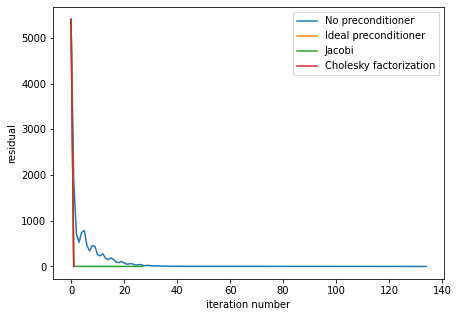

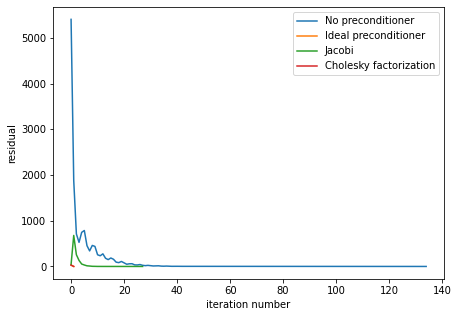

In [ ]:
# 2). Построим график зависимости невязки от номера итерации:

# невязку рассчитываем как r = ||A0 @ x - b0||, A0 и b0 - исходные данные
plt.figure(figsize=(7, 5))
plt.plot([i for i in range(len(res0[1]))], res0[1], label='No preconditioner')
plt.plot([i for i in range(len(res1[1]))], res1[2], label='Ideal preconditioner')
plt.plot([i for i in range(len(res2[1]))], res2[2], label='Jacobi')
plt.plot([i for i in range(len(res3[1]))], res3[2], label='Cholesky factorization')
plt.xlabel('iteration number')
plt.ylabel('residual')
plt.title('')
plt.legend()
plt.show()

# здесь r = ||A @ x - b||, A и b - данные, умноженные на предобуславливатель
plt.figure(figsize=(7, 5))
plt.plot([i for i in range(len(res0[1]))], res0[1], label='No preconditioner')
plt.plot([i for i in range(len(res1[1]))], res1[1], label='Ideal preconditioner')
plt.plot([i for i in range(len(res2[1]))], res2[1], label='Jacobi')
plt.plot([i for i in range(len(res3[1]))], res3[1], label='Cholesky factorization')
plt.xlabel('iteration number')
plt.ylabel('residual')
plt.title('')
plt.legend()
plt.show()

In [ ]:
# 3). Сравним время работы:
%%timeit
conj_grad(A, b, x0, 1e-7) # no preconditioner

1 loop, best of 5: 2.14 s per loop


In [ ]:
%%timeit
conj_grad(A, b, x0, 1e-7, A=A1, b=b1) # ideal preconditioner

100 loops, best of 5: 20 ms per loop


In [ ]:
%%timeit
conj_grad(A, b, x0, 1e-7, A=A2, b=b2) # Jacobi

1 loop, best of 5: 355 ms per loop


In [ ]:
%%timeit
conj_grad(A, b, x0, 1e-7, A=A3, b=b3) # Cholesky factorization

100 loops, best of 5: 20.3 ms per loop


Лучший результаты показали Ideal preconditioner и метод с факторизацией Холецкого, почти в 20 раз дольше работает Jacobi, и примерно в 100 раз дольше обычное решение без предобуславливателя.

Но при использовании предобуславливателей приходится рассчитывать новые матрицы, что тоже может занимать значительное количество времени. Проверим этот момент:

In [ ]:
%%timeit
# ideal preconditioner
M = np.linalg.inv(A)
A1 = M @ A
b1 = M @ b
conj_grad(A, b, x0, 1e-7, A=A1, b=b1)

1 loop, best of 5: 1.86 s per loop


In [ ]:
%%timeit
# Jacobi
M = np.linalg.inv(np.diag(np.diag(A)))
A2 = M @ A
b2 = M @ b
conj_grad(A, b, x0, 1e-7, A=A2, b=b2)

1 loop, best of 5: 2.3 s per loop


In [ ]:
%%timeit
# Cholesky factorization
L = np.linalg.cholesky(A)
M = np.linalg.inv(L @ L.T)
A3 = M @ A
b3 = M @ b
conj_grad(A, b, x0, 1e-7, A=A3, b=b3)

1 loop, best of 5: 2.52 s per loop


Видим, что время работы стало значительно больше и даже сравнимо со временем работы обычного метода без предобуславливателя...

# 🪅 Stochastic optimization tricks

You will study stochastic optimization in the setting of timeseries anomaly detection using an autoencoder.
[source](https://keras.io/examples/timeseries/timeseries_anomaly_detection/)

## Introduction

This script demonstrates how you can use a reconstruction convolutional
autoencoder model to detect anomalies in timeseries data.

## Setup

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

## Load the data

We will use the [Numenta Anomaly Benchmark(NAB)](
https://www.kaggle.com/boltzmannbrain/nab) dataset. It provides artifical
timeseries data containing labeled anomalous periods of behavior. Data are
ordered, timestamped, single-valued metrics.

We will use the `art_daily_small_noise.csv` file for training and the
`art_daily_jumpsup.csv` file for testing. The simplicity of this dataset
allows us to demonstrate anomaly detection effectively.

In [57]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

## Quick look at the data

In [58]:
print(df_small_noise.head())

print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


## Visualize the data
### Timeseries data without anomalies

We will use the following data for training.

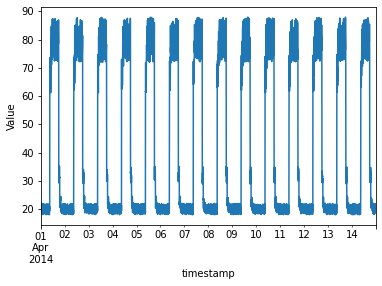

In [59]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.ylabel('Value')
plt.show()

### Timeseries data with anomalies

We will use the following data for testing and see if the sudden jump up in the
data is detected as an anomaly.

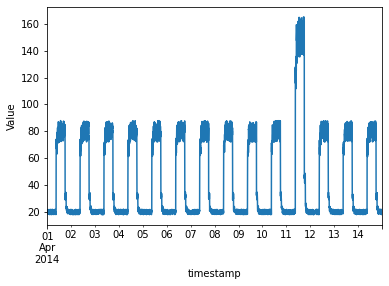

In [60]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.ylabel('Value')
plt.show()

## Prepare training data

Get data values from the training timeseries data file and normalize the
`value` data. We have a `value` for every 5 mins for 14 days.

-   24 * 60 / 5 = **288 timesteps per day**
-   288 * 14 = **4032 data points** in total

In [61]:

# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


### Create sequences
Create sequences combining `TIME_STEPS` contiguous data values from the
training data.

In [62]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


## Build a model

We will build a convolutional reconstruction autoencoder model. The model will
take input of shape `(batch_size, sequence_length, num_features)` and return
output of the same shape. In this case, `sequence_length` is 288 and
`num_features` is 1.

In [63]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_36 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_37 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_54 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_37 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_55 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

## Train the model

Please note that we are using `x_train` as both the input and the target
since this is a reconstruction model.

In [64]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 2s 62ms/step - loss: 0.4784 - val_loss: 0.0785
Epoch 2/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0760 - val_loss: 0.0312
Epoch 3/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0433 - val_loss: 0.0267
Epoch 4/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0347 - val_loss: 0.0229
Epoch 5/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0292 - val_loss: 0.0209
Epoch 6/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0256 - val_loss: 0.0192
Epoch 7/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0234 - val_loss: 0.0191
Epoch 8/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0215 - val_loss: 0.0193
Epoch 9/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0202 - val_loss: 0.0177
Epoch 10/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0193 - val_loss: 0.0181
Epoch 11/

Let's plot training and validation loss to see how the training went.

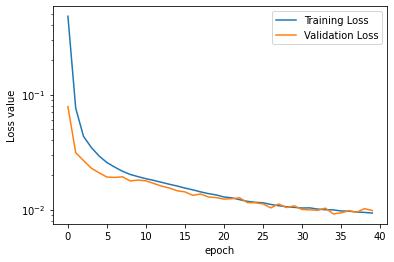

In [65]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Detecting anomalies

We will detect anomalies by determining how well our model can reconstruct
the input data.


1.   Find MAE loss on training samples.
2.   Find max MAE loss value. This is the worst our model has performed trying
to reconstruct a sample. We will make this the `threshold` for anomaly
detection.
3.   If the reconstruction loss for a sample is greater than this `threshold`
value then we can infer that the model is seeing a pattern that it isn't
familiar with. We will label this sample as an `anomaly`.


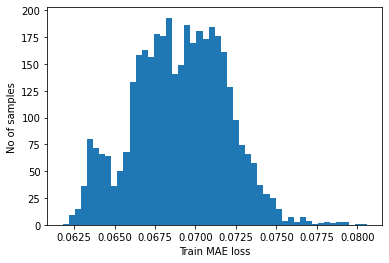

Reconstruction error threshold:  0.08059539121478711


In [66]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

### Compare recontruction

Just for fun, let's see how our model has recontructed the first sample.
This is the 288 timesteps from day 1 of our training dataset.

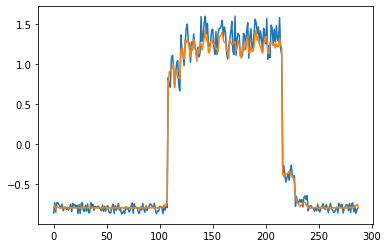

In [67]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

### Prepare test data

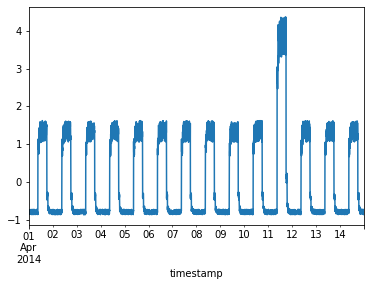

Test input shape:  (3745, 288, 1)


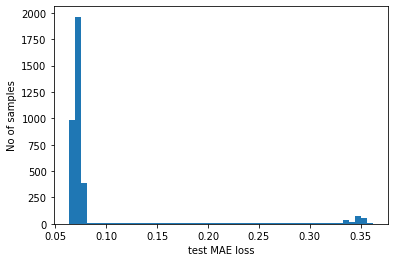

Number of anomaly samples:  404
Indices of anomaly samples:  (array([ 795, 1654, 1658, 1659, 2522, 2524, 2701, 2702, 2703, 2704, 2705,
       2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716,
       2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727,
       2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738,
       2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749,
       2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760,
       2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771,
       2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782,
       2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793,
       2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804,
       2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815,
       2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826,
       2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2

In [68]:

df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

## Plot anomalies

We now know the samples of the data which are anomalies. With this, we will
find the corresponding `timestamps` from the original test data. We will be
using the following method to do that:

Let's say time_steps = 3 and we have 10 training values. Our `x_train` will
look like this:

- 0, 1, 2
- 1, 2, 3
- 2, 3, 4
- 3, 4, 5
- 4, 5, 6
- 5, 6, 7
- 6, 7, 8
- 7, 8, 9

All except the initial and the final time_steps-1 data values, will appear in
`time_steps` number of samples. So, if we know that the samples
[(3, 4, 5), (4, 5, 6), (5, 6, 7)] are anomalies, we can say that the data point
5 is an anomaly.

In [69]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

Let's overlay the anomalies on the original test data plot.

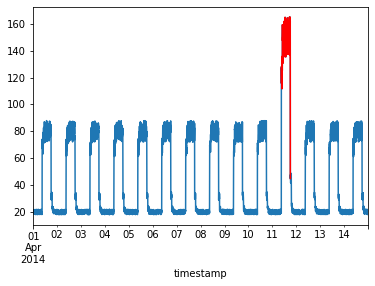

In [70]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

## Exercises:
In this problem you are to compare different ideas of stochastic optimization. Ensure, that the algorithms are compared in the same setting: same initialization (fix the [seed](https://keras.io/api/layers/initializers/)!) and same amount of epochs. 

### Learning rate schedule
* Train model using SGD optimizer with default hyperparameters. 
* Train model using SGD optimizer with learning rate decay. Instructions can be found via [this](https://keras.io/api/optimizers/learning_rate_schedules/) link. 
* Compare the results.

  Optional: Log results with wandb

<font color="lime"> ==YOUR ANSWER== </font>

Epoch 1/50
27/27 [==============================] - 2s 62ms/step - loss: 0.9222 - val_loss: 0.6869
Epoch 2/50
27/27 [==============================] - 1s 55ms/step - loss: 0.4206 - val_loss: 0.2101
Epoch 3/50
27/27 [==============================] - 2s 57ms/step - loss: 0.1792 - val_loss: 0.1016
Epoch 4/50
27/27 [==============================] - 1s 54ms/step - loss: 0.1148 - val_loss: 0.0684
Epoch 5/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0974 - val_loss: 0.0601
Epoch 6/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0909 - val_loss: 0.0569
Epoch 7/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0864 - val_loss: 0.0547
Epoch 8/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0831 - val_loss: 0.0533
Epoch 9/50
27/27 [==============================] - 2s 69ms/step - loss: 0.0803 - val_loss: 0.0517
Epoch 10/50
27/27 [==============================] - 3s 112ms/step - loss: 0.0784 - val_loss: 0.0511
Epoch 11

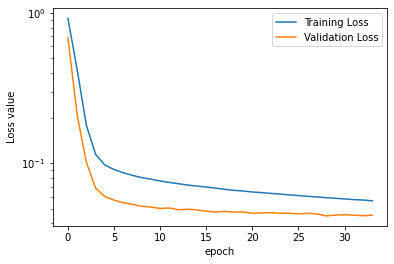

In [ ]:
# Создадим новую модель 
# SGD optimizer with default hyperparameters
model_SGD_def = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model_SGD_def.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="mse")

# Обучим её
history_SGD_def = model_SGD_def.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_SGD_def.history["loss"], label="Training Loss")
plt.semilogy(history_SGD_def.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Epoch 1/50
27/27 [==============================] - 2s 64ms/step - loss: 0.6154 - val_loss: 0.1801
Epoch 2/50
27/27 [==============================] - 2s 56ms/step - loss: 0.1804 - val_loss: 0.0655
Epoch 3/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0816 - val_loss: 0.0575
Epoch 4/50
27/27 [==============================] - 1s 56ms/step - loss: 0.0566 - val_loss: 0.0379
Epoch 5/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0500 - val_loss: 0.0388
Epoch 6/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0471 - val_loss: 0.0360
Epoch 7/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0447 - val_loss: 0.0345
Epoch 8/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0429 - val_loss: 0.0345
Epoch 9/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0414 - val_loss: 0.0330
Epoch 10/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0400 - val_loss: 0.0327
Epoch 11/

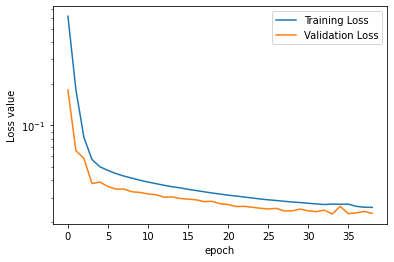

In [55]:
# Создадим новую модель 
# SGD optimizer with learning rate decay (Polinomial)
model_SGD_decay = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)

# Зададим Polynomial Decay
starter_learning_rate = 0.1
end_learning_rate = 0.01
decay_steps = 10000
learning_rate_fn = tf.keras.optimizers.schedules.PolynomialDecay(
    starter_learning_rate,
    decay_steps,
    end_learning_rate)
model_SGD_decay.compile(optimizer=keras.optimizers.SGD(learning_rate=learning_rate_fn), loss="mse")


# Обучим
history_SGD_decay = model_SGD_decay.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_SGD_decay.history["loss"], label="Training Loss")
plt.semilogy(history_SGD_decay.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Видим, что для оптимизатора SGD с уменьшением скорости обучения требуется чуть больше итераций и для validation Loss график менее гладкий, в отличие от обычного SGD.

### Acceleration
* Train model using SGD optimizer with default hyperparameters. 
* Train model using SGD optimizer with momentum term. 
* Train model using SGD optimizer with nesterov momentum term. Instructions can be found via [this](https://keras.io/api/optimizers/sgd/) link.  
* Compare the results.

  Optional: Log results with wandb

<font color="lime"> ==YOUR ANSWER== </font>

Epoch 1/50
27/27 [==============================] - 2s 64ms/step - loss: 0.8437 - val_loss: 0.4029
Epoch 2/50
27/27 [==============================] - 2s 56ms/step - loss: 0.2132 - val_loss: 0.0769
Epoch 3/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0908 - val_loss: 0.0524
Epoch 4/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0796 - val_loss: 0.0488
Epoch 5/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0741 - val_loss: 0.0474
Epoch 6/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0704 - val_loss: 0.0467
Epoch 7/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0678 - val_loss: 0.0460
Epoch 8/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0657 - val_loss: 0.0454
Epoch 9/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0638 - val_loss: 0.0453
Epoch 10/50
27/27 [==============================] - 2s 87ms/step - loss: 0.0621 - val_loss: 0.0446
Epoch 11/

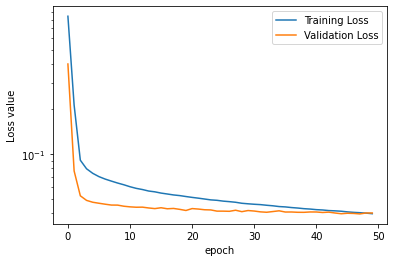

In [71]:
# SGD optimizer with default hyperparameters обучили в предыдущем пункте
# Создадим и обучим модель, используя SGD optimizer with momentum term
model_SGD_momentum = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model_SGD_momentum.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.5), loss="mse")

# Обучим её
history_SGD_momentum = model_SGD_momentum.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_SGD_momentum.history["loss"], label="Training Loss")
plt.semilogy(history_SGD_momentum.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Epoch 1/50
27/27 [==============================] - 2s 61ms/step - loss: 0.9161 - val_loss: 0.7733
Epoch 2/50
27/27 [==============================] - 2s 71ms/step - loss: 0.5064 - val_loss: 0.2735
Epoch 3/50
27/27 [==============================] - 1s 55ms/step - loss: 0.2366 - val_loss: 0.1475
Epoch 4/50
27/27 [==============================] - 1s 55ms/step - loss: 0.1510 - val_loss: 0.0908
Epoch 5/50
27/27 [==============================] - 2s 71ms/step - loss: 0.1143 - val_loss: 0.0669
Epoch 6/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0990 - val_loss: 0.0585
Epoch 7/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0917 - val_loss: 0.0551
Epoch 8/50
27/27 [==============================] - 1s 56ms/step - loss: 0.0873 - val_loss: 0.0530
Epoch 9/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0835 - val_loss: 0.0525
Epoch 10/50
27/27 [==============================] - 2s 72ms/step - loss: 0.0808 - val_loss: 0.0514
Epoch 11/

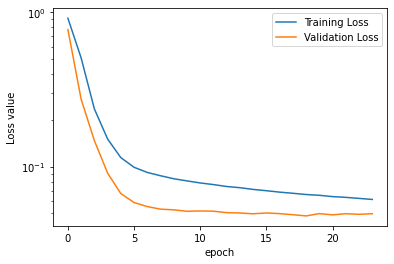

In [72]:
# SGD optimizer with nesterov momentum term
# Создадим и обучим модель, используя SGD optimizer with Nesterov momentum term
model_SGD_nesterov = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model_SGD_nesterov.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, nesterov=True), loss="mse")

# Обучим её
history_SGD_nesterov = model_SGD_nesterov.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_SGD_nesterov.history["loss"], label="Training Loss")
plt.semilogy(history_SGD_nesterov.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Nestrov momentum сходится медленнее.

### Adaptive methods
* Train model using SGD optimizer with default hyperparameters. 
* Train model using any adaptive method. Instructions can be found via [this](https://keras.io/api/optimizers/) link.  
* Compare the results.
* Try to perform different runs of SGD + Momentum and select the best hyperparameters. Do the same for the Adam in the similar setting. Compare the results.

  Optional: Log results with wandb

<font color="lime"> ==YOUR ANSWER== </font>

Epoch 1/50
27/27 [==============================] - 2s 61ms/step - loss: 0.9315 - val_loss: 0.1096
Epoch 2/50
27/27 [==============================] - 1s 54ms/step - loss: 0.1171 - val_loss: 0.0824
Epoch 3/50
27/27 [==============================] - 1s 54ms/step - loss: 0.1044 - val_loss: 0.0714
Epoch 4/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0713 - val_loss: 0.0587
Epoch 5/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0465 - val_loss: 0.0223
Epoch 6/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0336 - val_loss: 0.0450
Epoch 7/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0551 - val_loss: 0.0302
Epoch 8/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0514 - val_loss: 0.4451
Epoch 9/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0565 - val_loss: 0.0176
Epoch 10/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0247 - val_loss: 0.0530
Epoch 11/

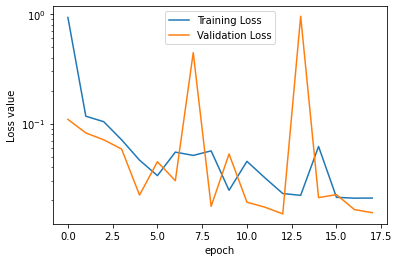

In [74]:
# Аналогично SGD optimizer with default hyperparameters посмотрим в начале
# Создадим и обучим модель, используя RMSprop optimizer (адаптивный алгоритм)
model_RMS = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model_RMS.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01), loss="mse")

# Обучим её
history_RMS = model_RMS.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_RMS.history["loss"], label="Training Loss")
plt.semilogy(history_RMS.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Epoch 1/50
27/27 [==============================] - 2s 60ms/step - loss: 0.4475 - val_loss: 0.0527
Epoch 2/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0559 - val_loss: 0.0384
Epoch 3/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0487 - val_loss: 0.0368
Epoch 4/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0445 - val_loss: 0.0361
Epoch 5/50
27/27 [==============================] - 2s 61ms/step - loss: 0.0412 - val_loss: 0.0353
Epoch 6/50
27/27 [==============================] - 2s 79ms/step - loss: 0.0384 - val_loss: 0.0336
Epoch 7/50
27/27 [==============================] - 2s 77ms/step - loss: 0.0363 - val_loss: 0.0321
Epoch 8/50
27/27 [==============================] - 3s 112ms/step - loss: 0.0345 - val_loss: 0.0322
Epoch 9/50
27/27 [==============================] - 3s 93ms/step - loss: 0.0329 - val_loss: 0.0305
Epoch 10/50
27/27 [==============================] - 3s 96ms/step - loss: 0.0316 - val_loss: 0.0302
Epoch 11

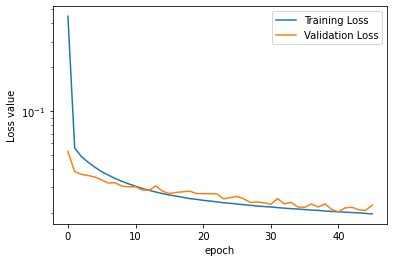

In [75]:
# Поподбираем гиперпараметры
# сравним сначала для разных learning_rate
# здесь learning_rate=0.1
model_SGD_momentum = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model_SGD_momentum.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.5), loss="mse")

# Обучим её
history_SGD_momentum = model_SGD_momentum.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_SGD_momentum.history["loss"], label="Training Loss")
plt.semilogy(history_SGD_momentum.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Epoch 1/50
27/27 [==============================] - 3s 65ms/step - loss: 0.9282 - val_loss: 0.7407
Epoch 2/50
27/27 [==============================] - 1s 51ms/step - loss: 0.4102 - val_loss: 0.1715
Epoch 3/50
27/27 [==============================] - 1s 51ms/step - loss: 0.1440 - val_loss: 0.0756
Epoch 4/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0983 - val_loss: 0.0579
Epoch 5/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0902 - val_loss: 0.0538
Epoch 6/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0873 - val_loss: 0.0526
Epoch 7/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0842 - val_loss: 0.0520
Epoch 8/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0820 - val_loss: 0.0510
Epoch 9/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0800 - val_loss: 0.0501
Epoch 10/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0781 - val_loss: 0.0501
Epoch 11/

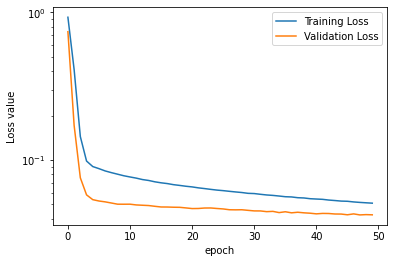

In [76]:
# learning_rate=0.005
model_SGD_momentum = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model_SGD_momentum.compile(optimizer=keras.optimizers.SGD(learning_rate=0.005, momentum=0.5), loss="mse")

# Обучим её
history_SGD_momentum = model_SGD_momentum.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_SGD_momentum.history["loss"], label="Training Loss")
plt.semilogy(history_SGD_momentum.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Epoch 1/50
27/27 [==============================] - 2s 60ms/step - loss: 0.6677 - val_loss: 0.4513
Epoch 2/50
27/27 [==============================] - 1s 55ms/step - loss: 0.3483 - val_loss: 0.1741
Epoch 3/50
27/27 [==============================] - 1s 55ms/step - loss: 0.2535 - val_loss: 0.2163
Epoch 4/50
27/27 [==============================] - 1s 55ms/step - loss: 0.1172 - val_loss: 0.0420
Epoch 5/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0809 - val_loss: 0.0853
Epoch 6/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0736 - val_loss: 0.0889
Epoch 7/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0716 - val_loss: 0.0349
Epoch 8/50
27/27 [==============================] - 3s 94ms/step - loss: 0.0719 - val_loss: 0.0872
Epoch 9/50
27/27 [==============================] - 3s 97ms/step - loss: 0.0730 - val_loss: 0.0508
Epoch 10/50
27/27 [==============================] - 2s 73ms/step - loss: 0.0645 - val_loss: 0.0861
Epoch 11/

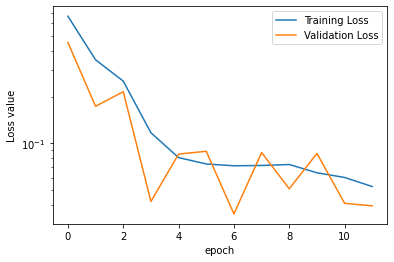

In [77]:
# посмотрим на разные momentum
# здесь momentum=1
model_SGD_momentum = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model_SGD_momentum.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=1), loss="mse")

# Обучим её
history_SGD_momentum = model_SGD_momentum.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_SGD_momentum.history["loss"], label="Training Loss")
plt.semilogy(history_SGD_momentum.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Epoch 1/50
27/27 [==============================] - 2s 57ms/step - loss: 0.9441 - val_loss: 0.8643
Epoch 2/50
27/27 [==============================] - 1s 51ms/step - loss: 0.7143 - val_loss: 0.4556
Epoch 3/50
27/27 [==============================] - 1s 52ms/step - loss: 0.2877 - val_loss: 0.1166
Epoch 4/50
27/27 [==============================] - 1s 50ms/step - loss: 0.1049 - val_loss: 0.0591
Epoch 5/50
27/27 [==============================] - 1s 50ms/step - loss: 0.0816 - val_loss: 0.0533
Epoch 6/50
27/27 [==============================] - 1s 52ms/step - loss: 0.0760 - val_loss: 0.0505
Epoch 7/50
27/27 [==============================] - 1s 50ms/step - loss: 0.0724 - val_loss: 0.0487
Epoch 8/50
27/27 [==============================] - 1s 51ms/step - loss: 0.0699 - val_loss: 0.0474
Epoch 9/50
27/27 [==============================] - 1s 51ms/step - loss: 0.0678 - val_loss: 0.0464
Epoch 10/50
27/27 [==============================] - 1s 50ms/step - loss: 0.0659 - val_loss: 0.0457
Epoch 11/

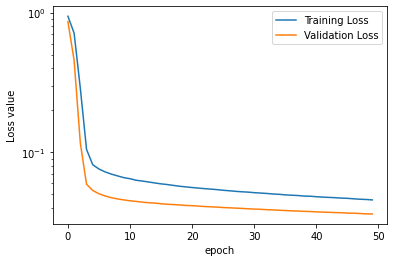

In [78]:
# здесь momentum=0.05
model_SGD_momentum = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model_SGD_momentum.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.05), loss="mse")

# Обучим её
history_SGD_momentum = model_SGD_momentum.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_SGD_momentum.history["loss"], label="Training Loss")
plt.semilogy(history_SGD_momentum.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Epoch 1/50
27/27 [==============================] - 2s 59ms/step - loss: 0.2586 - val_loss: 0.0443
Epoch 2/50
27/27 [==============================] - 1s 51ms/step - loss: 0.0522 - val_loss: 0.0290
Epoch 3/50
27/27 [==============================] - 1s 52ms/step - loss: 0.0365 - val_loss: 0.0246
Epoch 4/50
27/27 [==============================] - 1s 50ms/step - loss: 0.0296 - val_loss: 0.0238
Epoch 5/50
27/27 [==============================] - 1s 50ms/step - loss: 0.0251 - val_loss: 0.0235
Epoch 6/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0218 - val_loss: 0.0221
Epoch 7/50
27/27 [==============================] - 2s 63ms/step - loss: 0.0198 - val_loss: 0.0194
Epoch 8/50
27/27 [==============================] - 2s 70ms/step - loss: 0.0181 - val_loss: 0.0152
Epoch 9/50
27/27 [==============================] - 2s 75ms/step - loss: 0.0167 - val_loss: 0.0152
Epoch 10/50
27/27 [==============================] - 2s 72ms/step - loss: 0.0156 - val_loss: 0.0145
Epoch 11/

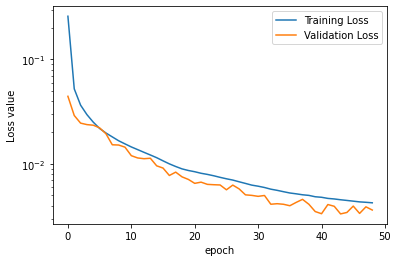

In [79]:
# Аналогично попробуем для Adam method
# learning_rate=0.005
model_Adam = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model_Adam.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss="mse")

# Обучим её
history_Adam = model_Adam.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_Adam.history["loss"], label="Training Loss")
plt.semilogy(history_Adam.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Epoch 1/50
27/27 [==============================] - 3s 92ms/step - loss: 0.2014 - val_loss: 0.0846
Epoch 2/50
27/27 [==============================] - 2s 74ms/step - loss: 0.0682 - val_loss: 0.0300
Epoch 3/50
27/27 [==============================] - 1s 51ms/step - loss: 0.0446 - val_loss: 0.0428
Epoch 4/50
27/27 [==============================] - 1s 49ms/step - loss: 0.0277 - val_loss: 0.0216
Epoch 5/50
27/27 [==============================] - 1s 50ms/step - loss: 0.0191 - val_loss: 0.0154
Epoch 6/50
27/27 [==============================] - 1s 51ms/step - loss: 0.0160 - val_loss: 0.0102
Epoch 7/50
27/27 [==============================] - 1s 51ms/step - loss: 0.0133 - val_loss: 0.0104
Epoch 8/50
27/27 [==============================] - 1s 52ms/step - loss: 0.0120 - val_loss: 0.0071
Epoch 9/50
27/27 [==============================] - 1s 50ms/step - loss: 0.0104 - val_loss: 0.0078
Epoch 10/50
27/27 [==============================] - 1s 51ms/step - loss: 0.0095 - val_loss: 0.0050
Epoch 11/

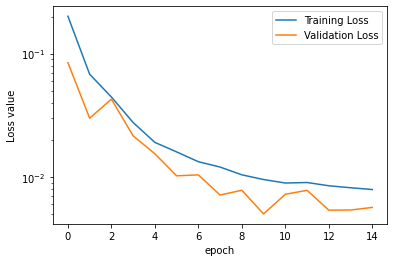

In [80]:
# beta_1=0.5, beta_2=0.5
model_Adam = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model_Adam.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.5, beta_2=0.5), loss="mse")

# Обучим её
history_Adam = model_Adam.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_Adam.history["loss"], label="Training Loss")
plt.semilogy(history_Adam.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Epoch 1/50
27/27 [==============================] - 2s 59ms/step - loss: 0.4768 - val_loss: 0.0859
Epoch 2/50
27/27 [==============================] - 1s 52ms/step - loss: 0.0707 - val_loss: 0.0349
Epoch 3/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0396 - val_loss: 0.0277
Epoch 4/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0324 - val_loss: 0.0234
Epoch 5/50
27/27 [==============================] - 1s 52ms/step - loss: 0.0276 - val_loss: 0.0212
Epoch 6/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0249 - val_loss: 0.0200
Epoch 7/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0227 - val_loss: 0.0186
Epoch 8/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0210 - val_loss: 0.0178
Epoch 9/50
27/27 [==============================] - 1s 52ms/step - loss: 0.0197 - val_loss: 0.0173
Epoch 10/50
27/27 [==============================] - 2s 67ms/step - loss: 0.0187 - val_loss: 0.0164
Epoch 11/

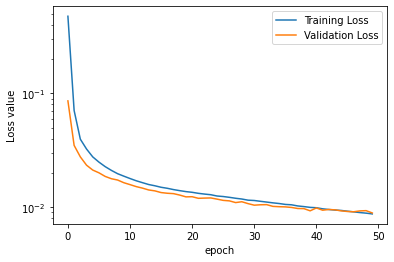

In [81]:
# amsgrad=True
model_Adam = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model_Adam.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01, amsgrad=True), loss="mse")

# Обучим её
history_Adam = model_Adam.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

# Посмотрим на графики процесса обучения
plt.semilogy(history_Adam.history["loss"], label="Training Loss")
plt.semilogy(history_Adam.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

Из небольших проведённых тестов:

Для Adam optimizer наилучшие результаты получились с параметрами learning_rate=0.01, amsgrad=True и дефолтными betta.

Для градиентного спуска с learning_rate=0.01, использованием deсay (полиномиальным), momentum=0, Nesterov=False.

[Link](https://colab.research.google.com/github/wandb/examples/blob/master/colabs/keras/Simple_Keras_Integration.ipynb) to the keras + wandb.

In [83]:
%%capture
!pip install wandb

In [84]:
import wandb
from wandb.keras import WandbCallback

!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [85]:
# Initialize wandb with your project name
run = wandb.init(project='my-keras-integration',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.01,
                     "epochs": 50,
                     "batch_size": 128,
                     "loss_function": "mse",
                     "architecture": "Autoencoder",
                     "dataset": "Daily anomaly"
                 })
config = wandb.config  # We'll use this to configure our experiment

wandb: Currently logged in as: nancat (superteam). Use `wandb login --relogin` to force relogin
